<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/nsfw/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opencv-python

In [39]:
# download a few images
!wget -O 0000.jpg http://badmilfs.net/wp-content/uploads/2016/06/badmilfs-porn.jpg
!wget -O 1111.jpg http://www.rushporn.com/screen/videos/images/horny-fucker-fucks-sexy-russian-girls-on-hd-quality-group-porn-1502750300.jpg
!wget -O 2222.jpg http://www.rexporn.com/static/tehreesome-squirting-porn.-alexis-fawx-and-her-stepdaughter-brittany-shae.jpg
!wget -O 3333.jpg https://www.vidtubeporn.com/fullimage/beautiful-porn-started-in-the-kitchen-and-continued-in-the-crib_1.jpg
!wget -O 4444.jpg https://www.ps4wallpapers.com/wp-content/uploads/2017/10/PS4Wallpapers.com_59da5795ba269_Beautiful-Naked-Girls-HQ-Wallpapers-20161129-2.jpg
!wget -O 5555.jpg http://cdn.hotnakedgirls.net/2019-03-18/594871_11.jpg
!wget -O 6666.jpg https://www.kindgirls.com/vids/scsmall/angelina-s.jpg
!wget -O 7777.jpg https://previews.123rf.com/images/piksel/piksel1204/piksel120400015/13063145-casual-man-standing.jpg
!wget -O 8888.jpg http://cdn.hotnakedgirls.net/2015-12-30/330251_06.jpg
!wget -O 9999.jpg https://cdn-pics.pornhd.com/pornhd/header/category/2_phd_category_big_anal-porn.jpg


--2019-05-25 16:57:50--  http://badmilfs.net/wp-content/uploads/2016/06/badmilfs-porn.jpg
Resolving badmilfs.net (badmilfs.net)... 5.149.248.193
Connecting to badmilfs.net (badmilfs.net)|5.149.248.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414272 (405K) [image/jpeg]
Saving to: ‘0000.jpg’

0000.jpg            100%[===================>] 404.56K   295KB/s    in 1.4s    

2019-05-25 16:57:52 (295 KB/s) - ‘0000.jpg’ saved [414272/414272]

--2019-05-25 16:57:53--  http://www.rushporn.com/screen/videos/images/horny-fucker-fucks-sexy-russian-girls-on-hd-quality-group-porn-1502750300.jpg
Resolving www.rushporn.com (www.rushporn.com)... 94.23.72.19, 2001:41d0:d:262d::1c
Connecting to www.rushporn.com (www.rushporn.com)|94.23.72.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32536 (32K) [image/jpeg]
Saving to: ‘1111.jpg’

1111.jpg            100%[===================>]  31.77K  --.-KB/s    in 0.1s    

2019-05-25 16:57:53 (222 KB/s) - 

In [0]:
# https://www.pyimagesearch.com/2019/03/04/holistically-nested-edge-detection-with-opencv-and-deep-learning/
# https://github.com/opencv/opencv/blob/master/samples/dnn/edge_detection.py

import cv2 as cv
import os

In [0]:
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = (inputShape[2] - targetShape[2]) // 2
        self.xstart = (inputShape[3] - targetShape[3]) // 2
        self.yend = self.ystart + height
        self.xend = self.xstart + width

        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]


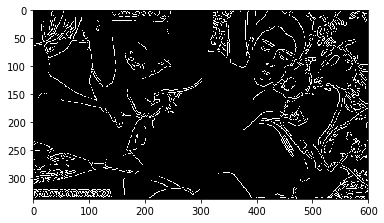

In [4]:
# load the input image and grab its dimensions
image = cv.imread("1111.jpg")
(H, W) = image.shape[:2]
 
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray, (5, 5), 0)
canny = cv.Canny(blurred, 80, 150)

from matplotlib import pyplot as plt
plt.imshow(canny, cmap='gray', vmin=0, vmax=255)

In [4]:
!git clone https://github.com/ashukid/hed-edge-detector.git

fatal: destination path 'hed-edge-detector' already exists and is not an empty directory.


In [0]:
protoPath = '/content/hed-edge-detector/deploy.prototxt'
modelPath = '/content/hed-edge-detector/hed_pretrained_bsds.caffemodel'
net = cv.dnn.readNetFromCaffe(protoPath, modelPath)
 
# register our new layer with the model
cv.dnn_registerLayer("Crop", CropLayer)

[INFO] performing holistically-nested edge detection...


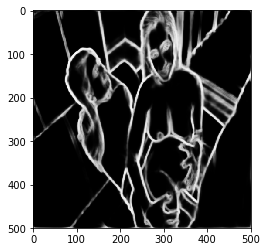

[INFO] performing holistically-nested edge detection...


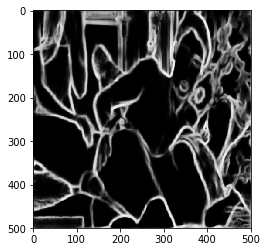

[INFO] performing holistically-nested edge detection...


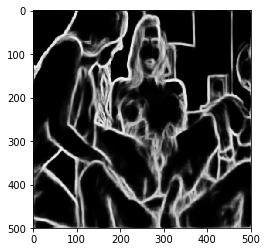

[INFO] performing holistically-nested edge detection...


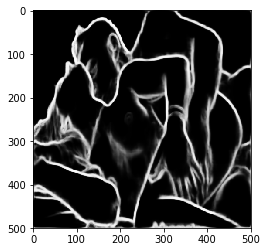

[INFO] performing holistically-nested edge detection...


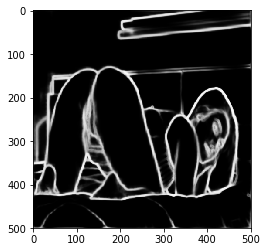

[INFO] performing holistically-nested edge detection...


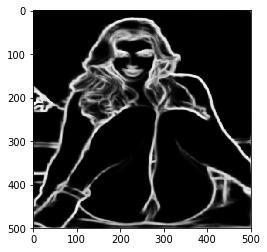

[INFO] performing holistically-nested edge detection...


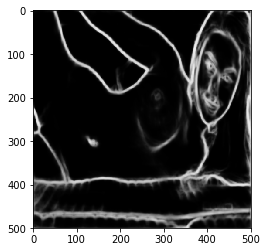

[INFO] performing holistically-nested edge detection...


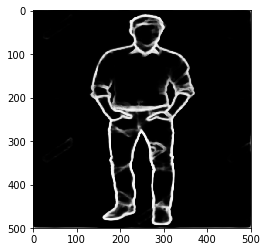

[INFO] performing holistically-nested edge detection...


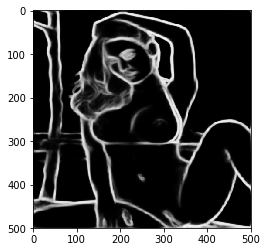

[INFO] performing holistically-nested edge detection...


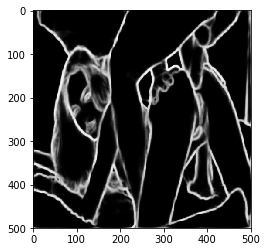

In [11]:
paths = ['0000.jpg','1111.jpg','2222.jpg','3333.jpg','4444.jpg','5555.jpg','6666.jpg','7777.jpg','8888.jpg','9999.jpg']
for img_path in paths:
    image = cv.imread(img_path)
    H, W = (500,500)
    
    # construct a blob out of the input image for the Holistically-Nested
    # Edge Detector
    blob = cv.dnn.blobFromImage(image, scalefactor=1.0, size=(W, H),
      mean=(104.00698793, 116.66876762, 122.67891434),
      swapRB=False, crop=False)

    # set the blob as the input to the network and perform a forward pass
    # to compute the edges
    print("[INFO] performing holistically-nested edge detection...")
    net.setInput(blob)
    hed = net.forward()
    hed = cv.resize(hed[0, 0], (W, H))
    hed = (255 * hed).astype("uint8")

    # Holistically-Nested Edge Detection
    plt.imshow(hed, cmap='gray', vmin=0, vmax=255)
    plt.show()

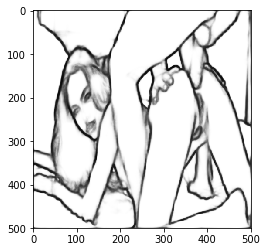

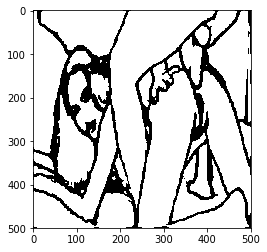

In [13]:
import numpy
hed_inverted = cv.bitwise_not(hed)

#print(hed_inverted)
plt.imshow(hed_inverted, cmap='gray', vmin=0, vmax=255)
plt.show()

ret, thresh = cv.threshold(hed_inverted, 200, 255, cv.THRESH_BINARY)

#print(thresh)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.show()


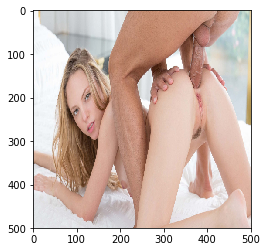

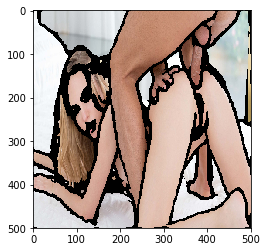

In [17]:
import numpy as np
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img = cv.resize(img, (W, H))

plt.imshow(img, cmap='brg', vmin=0, vmax=255)
plt.show()

#res = img * thresh
#mask = np.zeros(img.shape[:2], np.uint8)
mask = thresh.astype('uint8')
res = cv.bitwise_and(img,img,mask=mask)

plt.imshow(res)
plt.show()